In [1]:
from cryo_sbi import CryoEmSimulator
from cryo_sbi import gen_training_set
import torch
import matplotlib.pyplot as plt

/Data/Packages/Utilities/miniconda3/envs/cryosbi_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


hsp90_models.npy


/Data/Packages/Utilities/miniconda3/envs/cryosbi_env/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525495809/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Data/Documents/Research/SMBp/sim_based_inf/cryo_em_SBI/src/cryo_sbi/wpa_simulator/ctf.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  env = torch.exp(torch.tensor(-image_params["B_FACTOR"] * freq2_2d * 0.5))
/Data/Documents/Research/SMBp/sim_based_inf/cryo_em_SBI/src/cryo_sbi/wpa_simulator/ctf.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires

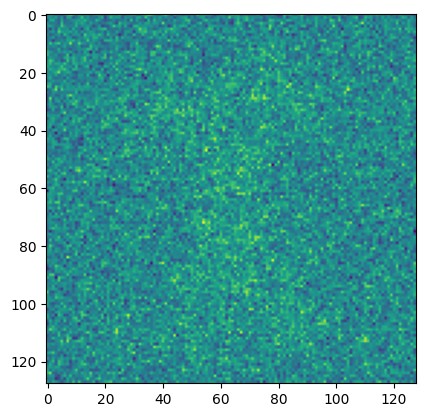

In [2]:
Simulator = CryoEmSimulator("config_file.json")
img = Simulator.simulator(torch.tensor([19]))
plt.imshow(img)

In [2]:
gen_training_set(
    config_file="config_file.json",
    num_train_samples=10000,
    num_val_samples=100,
    file_name="tut_imgs",
    save_as_tensor=False,
    n_workers=2,
    batch_size=100
)

hsp90_models.npy


/Data/Packages/Utilities/miniconda3/envs/cryosbi_env/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Data/Documents/Research/SMBp/sim_based_inf/cryo_em_SBI/src/cryo_sbi/wpa_simulator/ctf.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  env = torch.exp(torch.tensor(-image_params["B_FACTOR"] * freq2_2d * 0.5))
/Data/Documents/Research/SMBp/sim_based_inf/cryo_em_SBI/src/cryo_sbi/wpa_simulator/ctf.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourc

In [3]:
from cryo_sbi.inference.NPE_train_from_disk import npe_train_from_disk

In [5]:
npe_train_from_disk(
    train_config="resnet18_encoder.json",
    epochs=350,
    train_data_dir="tut_imgs_train.h5",
    val_data_dir="tut_imgs_valid.h5",
    estimator_file="tut_estimator",
    loss_file="tut_loss",
    train_from_checkpoint=False,
    model_state_dict=None,
    n_workers=2
)

AssertionError: Torch not compiled with CUDA enabled